<a href="https://colab.research.google.com/github/atishbasu95/atishbasu.github.io/blob/main/BA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

# Load data (CSV export from Google Sheets)
df = pd.read_csv("BA_Project_Sales_Only.csv")

df.head()

,InvoiceNo_Clean,StockCode,Description,Quantity,Invoice Date,UnitPrice,Revenue,CustomerID,Country,TransactionType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,2.55,15.30,17850,United Kingdom,Sale
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010,1.69,54.08,13047,United Kingdom,Sale
2,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01-12-2010,3.75,90.00,12583,France,Sale
3,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,01-12-2010,2.55,204.00,13748,United Kingdom,Sale
4,536374,21258,VICTORIAN SEWING BOX LARGE,32,01-12-2010,10.95,350.40,15100,United Kingdom,Sale


In [8]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InvoiceNo_Clean  4157 non-null   int64  
 1   StockCode        4157 non-null   object 
 2   Description      4157 non-null   object 
 3   Quantity         4157 non-null   int64  
 4   Invoice Date     4157 non-null   object 
 5   UnitPrice        4157 non-null   float64
 6   Revenue          4157 non-null   float64
 7   CustomerID       4157 non-null   int64  
 8   Country          4157 non-null   object 
 9   TransactionType  4157 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 324.9+ KB


,InvoiceNo_Clean,Quantity,UnitPrice,Revenue,CustomerID
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,552816.412317,44.487371,4.108124,70.803957,15303.629300
std,13073.343567,1173.838649,10.496814,1511.204261,1735.446223
min,536365.000000,1.000000,0.040000,0.210000,0.000000
25%,541510.000000,3.000000,1.250000,10.000000,13819.000000
50%,549250.000000,8.000000,2.100000,16.500000,15307.000000
75%,564216.000000,12.000000,4.950000,25.500000,16780.000000
max,581416.000000,74215.000000,295.000000,77183.600000,18287.000000


In [11]:
# Convert date
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], dayfirst=True)

# Remove duplicates
df = df.drop_duplicates()

# Create new columns
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month

In [14]:
df = df[df['Revenue'] > 0]

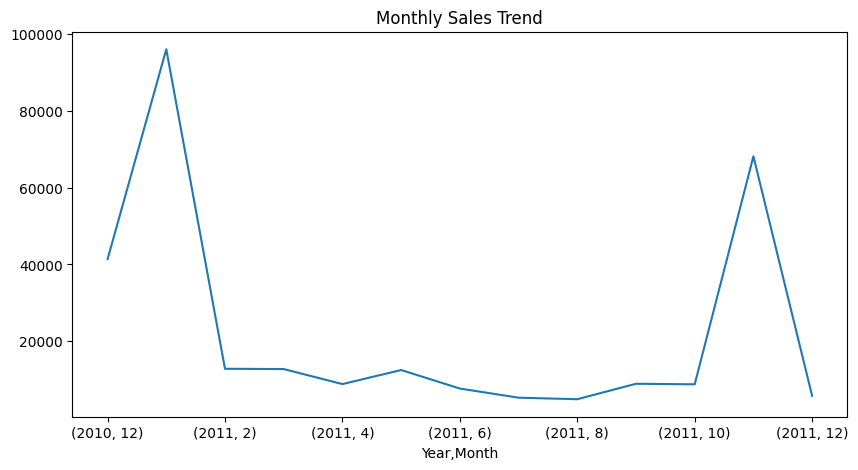

In [16]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby(['Year','Month'])['Revenue'].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.show()

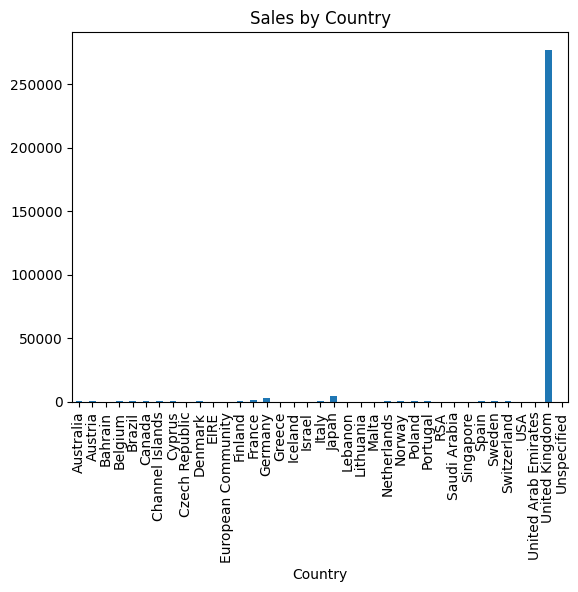

In [18]:
category_sales = df.groupby('Country')['Revenue'].sum()

category_sales.plot(kind='bar')
plt.title("Sales by Country")
plt.show()

In [20]:
customer_data = df.groupby('CustomerID').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'InvoiceNo_Clean': 'nunique' # Counts unique InvoiceNo_Clean as a proxy for Order ID
}).rename(columns={'InvoiceNo_Clean': 'OrderCount'}).reset_index()

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Revenue','Quantity','OrderCount']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Segment'] = kmeans.fit_predict(scaled_data)

In [23]:
df.to_csv("cleaned_sales_data.csv", index=False)
customer_data.to_csv("customer_segments.csv", index=False)
